In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import scipy.stats as ss
import itertools
import sklearn

In [2]:
# https://www.kaggle.com/c/nfl-playing-surface-analytics/data  has all data info
playlist = pd.read_csv('PlayList.csv')
inj = pd.read_csv('InjuryRecord.csv')
trk = pd.read_csv('PlayerTrackData.csv')

In [3]:
inj

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1
...,...,...,...,...,...,...,...,...,...
100,44423,44423-13,NaN,Knee,Synthetic,1,0,0,0
101,31933,31933-20,NaN,Knee,Synthetic,1,0,0,0
102,47285,47285-4,NaN,Knee,Natural,1,1,0,0
103,37068,37068-19,NaN,Knee,Natural,1,1,0,0


Those Heckin NaNs

In [4]:
playlist.keys()

Index(['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup'],
      dtype='object')

I want to formulate a master data frame from which I can extract features from and kick out all the ones I dont need

Have to get Stadium Type and Weather into workable forms.

In [5]:
# .str vectorizes column (instead of evaluating as a series, goes line by line)
# Weather Conditions (Just the Major weather conditions)
playlist['Cloudy'] = playlist['Weather'].str.contains('Cloudy|cloudy', na = False, regex=True)
playlist['Sunny'] = playlist['Weather'].str.contains('Sunny|Sun|Clear|sunny|clear', na = False, regex = True)
playlist['Snow'] = playlist['Weather'].str.contains('Snow|snow|Snowy|snowy', na = False, regex = True)
playlist['Rain'] = playlist['Weather'].str.contains('Rain|rain|Rainy|rainy|Showers|shower', na = False, regex = True)
playlist['Indoor'] = playlist['Weather'].str.contains('Indoor|indoor|Controlled Climate', na = False, regex = True)
# Grass type (All types included)
playlist['Synthetic'] = playlist['FieldType'].str.contains('Synthetic', regex = True)
playlist['Natural'] = playlist['FieldType'].str.contains('Natural', regex = True)
# Grass type (All types included)
playlist['Indoor'] = playlist['StadiumType'].str.contains('Indoor|Closed|closed|Indoors', na = False, regex = True)
playlist['Outdoor'] = playlist['StadiumType'].str.contains('Outdoor|Oudoor|Ourdoor|Outdoors|Open|Bowl|Outddors|open|Heinz|outdor|Outside', na = False, regex = True)



In [6]:
clean_df = playlist.drop(columns = [ 'Weather', 'FieldType','StadiumType'])

In [7]:
inj_df = inj.dropna().merge(clean_df, left_on=['PlayKey'], right_on=['PlayKey'], how='left')
inj_df

,PlayerKey_x,GameID_x,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey_y,...,Position,PositionGroup,Cloudy,Sunny,Snow,Rain,Indoor,Synthetic,Natural,Outdoor
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,39873,...,OLB,LB,True,False,False,False,True,True,False,False
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,46074,...,OLB,LB,True,False,False,False,False,False,True,True
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,36557,...,SS,DB,False,True,False,False,False,True,False,True
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,46646,...,LB,LB,True,False,False,False,False,False,True,True
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,43532,...,WR,WR,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,42418,42418-19,42418-19-15,Ankle,Synthetic,1,0,0,0,42418,...,C,OL,True,False,False,False,True,True,False,False
73,46394,46394-18,46394-18-3,Knee,Synthetic,1,1,0,0,46394,...,TE,TE,True,False,False,False,False,True,False,True
74,45187,45187-9,45187-9-4,Ankle,Natural,1,0,0,0,45187,...,WR,WR,True,False,False,False,False,False,True,True
75,42448,42448-14,42448-14-3,Knee,Synthetic,1,1,1,0,42448,...,WR,WR,True,False,False,False,False,True,False,False


# Firstly, I am going to graph a bunch of different factors, some similar to ones from other competitors, to practice and see if I can gain any new information or inspiration for increasing the amount of features in my ML models. I'll reorganize everything later

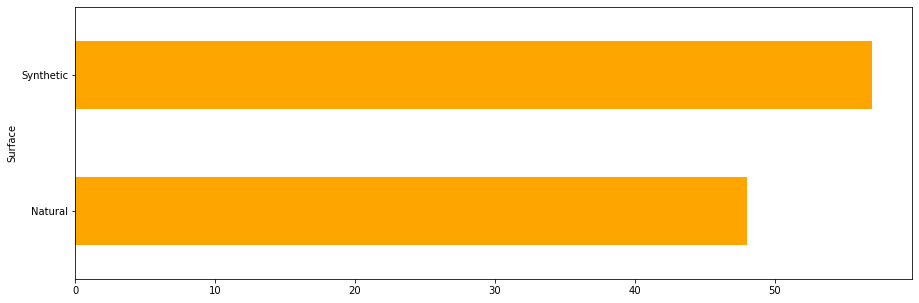

In [8]:
inj.groupby('Surface').count()['PlayerKey'].sort_values().plot(figsize = (15,5), kind = 'barh', color = 'orange')
plt.show()

- Not a huge difference, especially for the number of data points we have.
- Difficult to conclude anything.

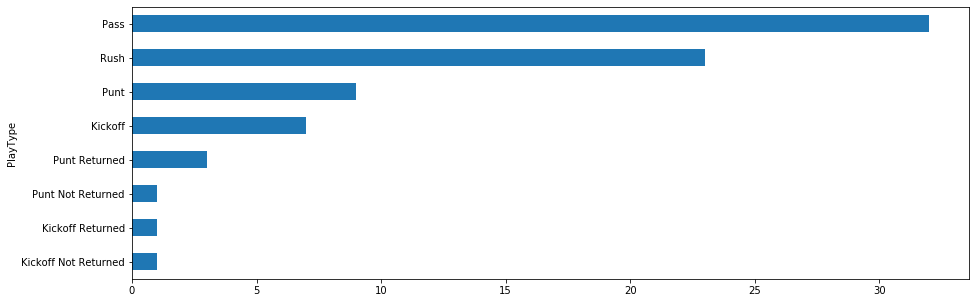

In [9]:
inj_df.groupby('PlayType')['PlayKey'].count().sort_values().plot(figsize = (15,5), kind = 'barh')
plt.show()

As much as I would love to conclude that pass plays are the most dangerous, they do make up a majority of plays.

Lets look at the fractional difference.

In [10]:
inj_play = inj_df.groupby('PlayType')['PlayKey'].count()
inj_play

PlayType
Kickoff                  7
Kickoff Not Returned     1
Kickoff Returned         1
Pass                    32
Punt                     9
Punt Not Returned        1
Punt Returned            3
Rush                    23
Name: PlayKey, dtype: int64

Could have done a for loop for this, but I only had 2 outputs I wanted so I didn't

In [11]:
# Finding fraction of plays where a player was injured on a pass
inj_play = inj_df.groupby('PlayType')['PlayKey'].count()
inj_pass = inj_play.Pass
inj_plays_total = inj_play.sum()
inj_pass_frac = inj_pass/inj_plays_total
print('Fraction of plays that resulted in injury that are also pass plays:', inj_pass_frac)
#Finding fraction of plays that are a passing plays
play = clean_df.groupby('PlayType')['PlayKey'].count()
pass_ = play.Pass
plays_total = play.sum()
pass_frac = pass_/plays_total
print('Fraction of plays that are passing plays:', pass_frac)
#Percent difference 
percent_diff = (abs(inj_pass_frac - pass_frac)/pass_frac) * 100
print('Percent difference is: ', percent_diff, '%')

Fraction of plays that resulted in injury that are also pass plays: 0.4155844155844156
Fraction of plays that are passing plays: 0.5178519190813012
Percent difference is:  19.748406779743906 %


In [12]:
# Finding fraction of plays where a player was injured on a pass
inj_play = inj_df.groupby('PlayType')['PlayKey'].count()
inj_rush = inj_play.Rush
inj_plays_total = inj_play.sum()
inj_rush_frac = inj_rush/inj_plays_total
print('Fraction of plays that resulted in injury that are also rush plays:', inj_rush_frac)
#Finding fraction of plays that are a passing plays
play = clean_df.groupby('PlayType')['PlayKey'].count()
rush_ = play.Rush
plays_total = play.sum()
rush_frac = rush_/plays_total
print('Fraction of plays that are rushing plays:', rush_frac)
#Percent difference 
percent_diff = (abs(inj_rush_frac - rush_frac)/rush_frac) * 100
print('Percent difference is: ', percent_diff, '%')

Fraction of plays that resulted in injury that are also rush plays: 0.2987012987012987
Fraction of plays that are rushing plays: 0.3473098358073493
Percent difference is:  13.995727184937396 %


These numbers are relatively close to one another, so we cannot conclude that there is an increased risk based on the play type. (Only did it on the two most prevalent types since the amount of data for the others is scary small)

In [13]:
Temperature_all = clean_df.Temperature[(clean_df.Temperature > -100) & (clean_df.Temperature < 200)]

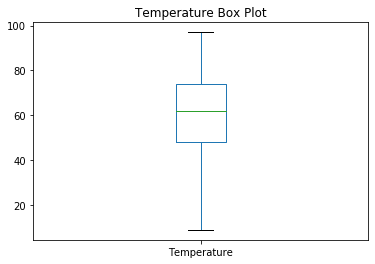

In [14]:
Temperature_all.plot.box(title = 'Temperature Box Plot')

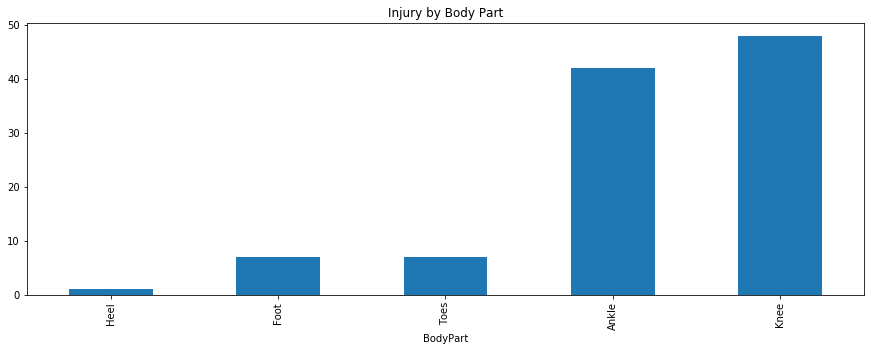

In [15]:
inj.groupby(['BodyPart'])['PlayerKey'].count().sort_values().plot(kind = 'bar', figsize = (15,5), title = 'Injury by Body Part')
plt.show()

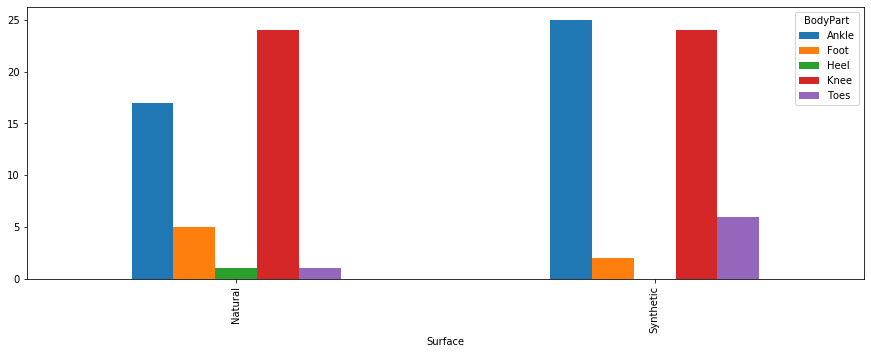

In [16]:
inj.groupby(['BodyPart','Surface'])['PlayerKey'].count().unstack().T.plot(kind = 'bar', figsize = (15,5))
plt.show()

In [17]:
# Want to make sure that all games are accounted for
print(clean_df.GameID.isnull().sum())
df_unique_games = clean_df.drop(columns = ['PlayerKey','PlayKey']).groupby('GameID').first()
# Roster Position just acts as a full row in this instance
dic_of_weathers = {}
def get_weather_counts(weather_type):
    dic_of_weathers["{}_count".format(weather_type)] = df_unique_games.groupby('{}'.format(weather_type))['RosterPosition'].count().loc[True]

get_weather_counts('Cloudy')
get_weather_counts('Sunny')
get_weather_counts('Snow')
get_weather_counts('Rain')
get_weather_counts('Indoor')
print(dic_of_weathers)

0
{'Cloudy_count': 2337, 'Sunny_count': 2044, 'Snow_count': 38, 'Rain_count': 365, 'Indoor_count': 902}


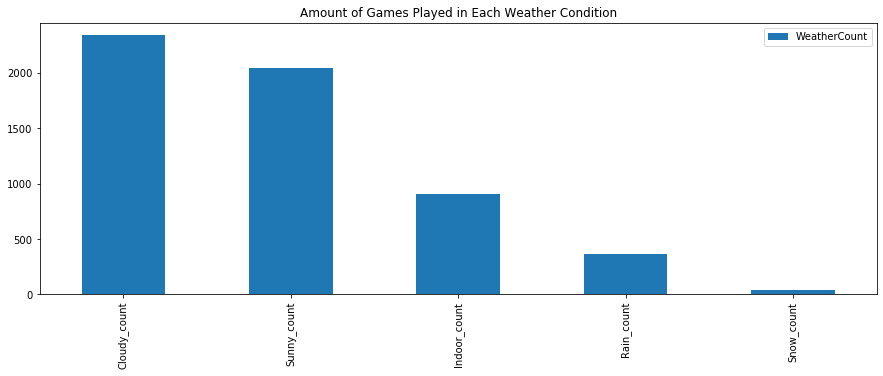

In [18]:
WeatherCount = pd.DataFrame(data = dic_of_weathers.values(),
                            index = dic_of_weathers.keys())\
                            .rename(columns = {0: "WeatherCount"})
WeatherCount.sort_values('WeatherCount', ascending = False).plot(kind = 'bar',
                                                                 title = 'Amount of Games Played in Each Weather Condition',
                                                                 figsize = (15,5))
plt.show()

# Injury Based Data:
We would be wise to make a column based on the injuries that took place and then analyze the coniditions that were in place to see if there is any immediate connection between the factors and injury outcome.

In [19]:
print(inj['PlayKey'].isna().sum())

28


Since there are 28 missing plays from the data set where a player got injured it complicates things on a large scale, but it is not impossible to work with some larger overarching factors that are more game specific than play by play.

In [20]:
merged_inj = inj.merge(right = clean_df, on =['GameID','PlayerKey'], how = 'left')
# Only want the ones that weren't replicated(bc that means that theyre the first unique of their kind), the ~ reverses the
# the boolean series and dropped columns that no longer made sense
merged_inj = merged_inj[~merged_inj.duplicated(subset = ['GameID','PlayerKey'], keep = 'first')]\
    .drop(columns = ['PlayKey_x','PlayKey_y','PlayerGamePlay','PlayType'])

Important to note that we have dropped a single play from the list since he got injured twice in the same game. Since we do not have all of the PlayIDs we cannot properly fill in for everything.

In [21]:
Temperature_inj = merged_inj.Temperature[(merged_inj.Temperature > -100) & (merged_inj.Temperature < 200)]

No handles with labels found to put in legend.


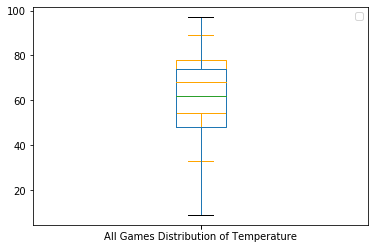

percent diff of temperature in mean of temp  7.352431363593921 %


In [22]:
Temperature_inj = merged_inj.Temperature[(merged_inj.Temperature > -100) & (merged_inj.Temperature < 200)]
Temperature_all = clean_df.Temperature[(clean_df.Temperature > -100) & (clean_df.Temperature < 200)]
fig, ax = plt.subplots()
inj_temp = Temperature_inj.plot.box(Temperature_inj, color = 'orange', label = 'Injury Distribution of Temperature')
all_temp = Temperature_all.plot.box(label = 'All Games Distribution of Temperature')
plt.legend()
plt.show()
print("percent diff of temperature in mean of temp ",(Temperature_inj.mean() - Temperature_all.mean())/Temperature_all.mean() * 100,"%")

In [23]:
merged_inj.DM_M1 = merged_inj.DM_M1 - merged_inj.DM_M7
merged_inj.DM_M7 = merged_inj.DM_M7 - merged_inj.DM_M28
merged_inj.DM_M28 = merged_inj.DM_M28 - merged_inj.DM_M42
merged_inj

,PlayerKey,GameID,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,...,Position,PositionGroup,Cloudy,Sunny,Snow,Rain,Indoor,Synthetic,Natural,Outdoor
0,39873,39873-4,Knee,Synthetic,0,0,0,1,Linebacker,29,...,OLB,LB,True,False,False,False,True,True,False,False
32,46074,46074-7,Knee,Natural,0,1,0,0,Linebacker,50,...,OLB,LB,True,False,False,False,False,False,True,True
58,36557,36557-1,Ankle,Synthetic,0,0,0,1,Safety,1,...,SS,DB,False,True,False,False,False,True,False,True
128,46646,46646-3,Ankle,Natural,1,0,0,0,Linebacker,15,...,LB,LB,True,False,False,False,False,False,True,True
158,43532,43532-5,Ankle,Synthetic,0,0,0,1,Wide Receiver,32,...,WR,WR,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,44423,44423-13,Knee,Synthetic,1,0,0,0,Wide Receiver,365,...,WR,WR,False,True,False,False,False,True,False,True
3319,31933,31933-20,Knee,Synthetic,1,0,0,0,Tight End,394,...,TE,TE,True,False,False,False,True,True,False,False
3345,47285,47285-4,Knee,Natural,0,1,0,0,Wide Receiver,22,...,WR,WR,False,False,False,False,False,False,True,False
3361,37068,37068-19,Knee,Natural,0,1,0,0,Linebacker,417,...,OLB,LB,False,True,False,False,False,False,True,True


In [24]:
merged_inj.Injured = merged_inj.DM_M1 + merged_inj.DM_M7 + merged_inj.DM_M28 +merged_inj.DM_M42

C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [25]:
clean_df.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,Temperature,PlayType,PlayerGamePlay,Position,PositionGroup,Cloudy,Sunny,Snow,Rain,Indoor,Synthetic,Natural,Outdoor
0,26624,26624-1,26624-1-1,Quarterback,1,1,63,Pass,1,QB,QB,False,True,False,False,False,True,False,True
1,26624,26624-1,26624-1-2,Quarterback,1,1,63,Pass,2,QB,QB,False,True,False,False,False,True,False,True
2,26624,26624-1,26624-1-3,Quarterback,1,1,63,Rush,3,QB,QB,False,True,False,False,False,True,False,True
3,26624,26624-1,26624-1-4,Quarterback,1,1,63,Rush,4,QB,QB,False,True,False,False,False,True,False,True
4,26624,26624-1,26624-1-5,Quarterback,1,1,63,Pass,5,QB,QB,False,True,False,False,False,True,False,True


In [26]:
game_df_cleaned =clean_df[['GameID', 'Cloudy', 'Sunny', 'Snow', 'Rain', 'Indoor',
                           'Synthetic', 'Natural', 'Outdoor', 'Temperature', 'Position']]\
.drop_duplicates().reset_index().drop(columns=['index'])

In [27]:
print(game_df_cleaned.keys())
game_df_cleaned.head()

Index(['GameID', 'Cloudy', 'Sunny', 'Snow', 'Rain', 'Indoor', 'Synthetic',
       'Natural', 'Outdoor', 'Temperature', 'Position'],
      dtype='object')


,GameID,Cloudy,Sunny,Snow,Rain,Indoor,Synthetic,Natural,Outdoor,Temperature,Position
0,26624-1,False,True,False,False,False,True,False,True,63,QB
1,26624-2,True,False,False,False,True,True,False,False,85,QB
2,26624-3,False,True,False,False,False,True,False,True,84,QB
3,26624-3,False,True,False,False,False,True,False,True,84,Missing Data
4,26624-4,False,True,False,False,False,True,False,True,61,QB


In [28]:
print(inj.keys())
inj.head()

Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')


,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [29]:
game_injury_df = inj.merge(game_df_cleaned, on = 'GameID', how = 'outer').drop_duplicates()
#
game_injury_df['DM_M1'] = game_injury_df['DM_M1'].fillna(0).astype(int)
game_injury_df['DM_M7'] = game_injury_df['DM_M7'].fillna(0).astype(int)
game_injury_df['DM_M28'] = game_injury_df['DM_M28'].fillna(0).astype(int)
game_injury_df['DM_M42'] = game_injury_df['DM_M42'].fillna(0).astype(int)
#
game_injury_df.DM_M1 = game_injury_df.DM_M1 - game_injury_df.DM_M7
game_injury_df.DM_M7 = game_injury_df.DM_M7 - game_injury_df.DM_M28
game_injury_df.DM_M28 = game_injury_df.DM_M28 - game_injury_df.DM_M42
#
game_injury_df = game_injury_df.drop(columns=['PlayerKey', 'PlayKey','Surface'])

game_injury_df['Injury'] = game_injury_df['DM_M1'] + game_injury_df['DM_M7']\
+ game_injury_df['DM_M28'] + game_injury_df['DM_M42']
#
game_injury_df

,GameID,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,Cloudy,Sunny,Snow,Rain,Indoor,Synthetic,Natural,Outdoor,Temperature,Position,Injury
0,39873-4,Knee,0,0,0,1,True,False,False,False,True,True,False,False,84,OLB,1
1,46074-7,Knee,0,1,0,0,True,False,False,False,False,False,True,True,76,OLB,1
2,36557-1,Ankle,0,0,0,1,False,True,False,False,False,True,False,True,63,SS,1
3,46646-3,Ankle,1,0,0,0,True,False,False,False,False,False,True,True,80,LB,1
4,43532-5,Ankle,0,0,0,1,True,False,False,False,False,True,False,False,89,WR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,47888-9,NaN,0,0,0,0,True,False,False,False,False,True,False,True,53,DB,0
5738,47888-10,NaN,0,0,0,0,True,False,False,False,False,False,True,True,82,DB,0
5739,47888-11,NaN,0,0,0,0,True,False,False,False,False,False,True,True,42,DB,0
5740,47888-12,NaN,0,0,0,0,False,True,False,False,False,True,False,True,40,DB,0


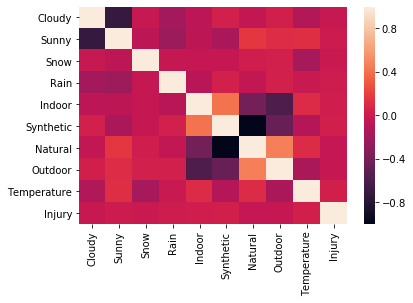

In [66]:
corr_df = game_injury_df.drop(columns = ['DM_M1','DM_M7','DM_M28','DM_M42','GameID','BodyPart'])
corr_df = corr_df[(corr_df.Temperature > -100) & (corr_df.Temperature < 200)]
sns.heatmap(corr_df.corr())

In [31]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


In [32]:
# Source:
# https://stackoverflow.com/questions/51859894/how-to-plot-a-cramer-s-v-heatmap-for-categorical-features
def plot_cramers_v_heatmap(df, cols):
    corrM = np.zeros((len(cols),len(cols)))

    for col1, col2 in itertools.combinations(cols, 2):
        idx1, idx2 = cols.index(col1), cols.index(col2)
        corrM[idx1, idx2] = cramers_v(pd.crosstab(df[col1], df[col2]).as_matrix())
        corrM[idx2, idx1] = corrM[idx1, idx2]

    corr = pd.DataFrame(corrM, index=cols, columns=cols)
    fig, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [33]:
corr_df.keys()

Index(['Cloudy', 'Sunny', 'Snow', 'Rain', 'Indoor', 'Synthetic', 'Natural',
       'Outdoor', 'Temperature', 'Position', 'Injury'],
      dtype='object')

C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


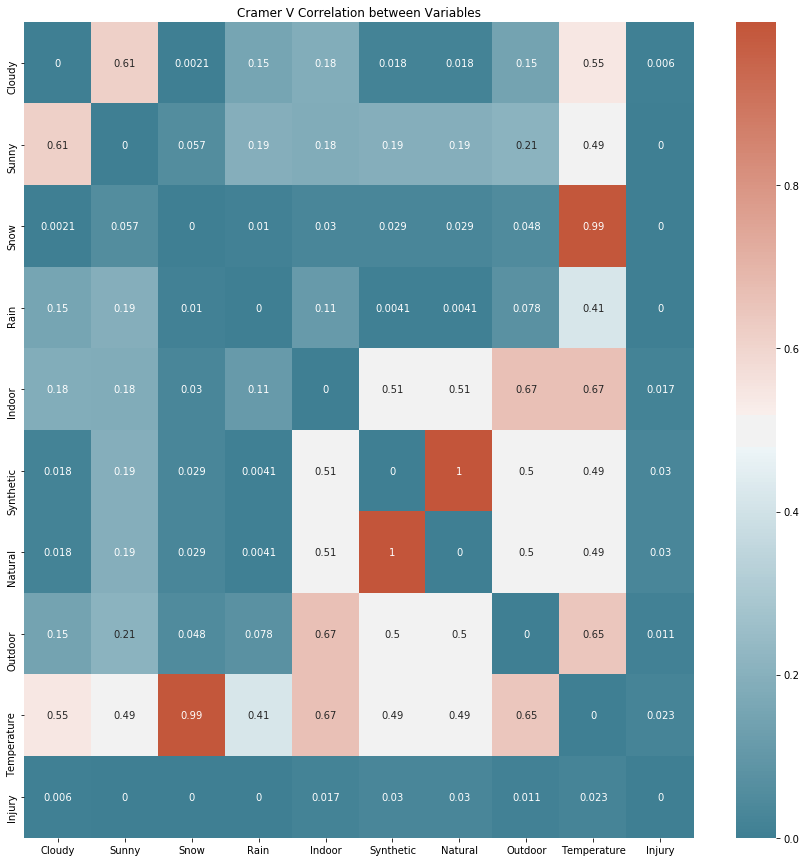

In [34]:
columns = ['Cloudy', 'Sunny', 'Snow', 'Rain', 'Indoor', 'Synthetic', 'Natural',
       'Outdoor', 'Temperature', 'Injury']
plot_cramers_v_heatmap(corr_df, columns)

As far as correlation goes, theres nothing but hot garbage here.

In [35]:
play_injury_df_dummies = pd.get_dummies(corr_df,\
                                        columns = ['Position'], dummy_na = True, drop_first = True)
play_injury_df_dummies = play_injury_df_dummies.drop(columns = ['Position_nan','Position_Missing Data'])

In [36]:
columns = ['Position_CB', 'Position_DB',
       'Position_DE', 'Position_DT', 'Position_FS', 'Position_G',
       'Position_HB', 'Position_ILB', 'Position_K', 'Position_LB',
       'Position_MLB', 'Position_NT', 'Position_OLB', 'Position_P',
       'Position_QB', 'Position_RB', 'Position_S', 'Position_SS', 'Position_T',
       'Position_TE', 'Position_WR','Injury']

C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


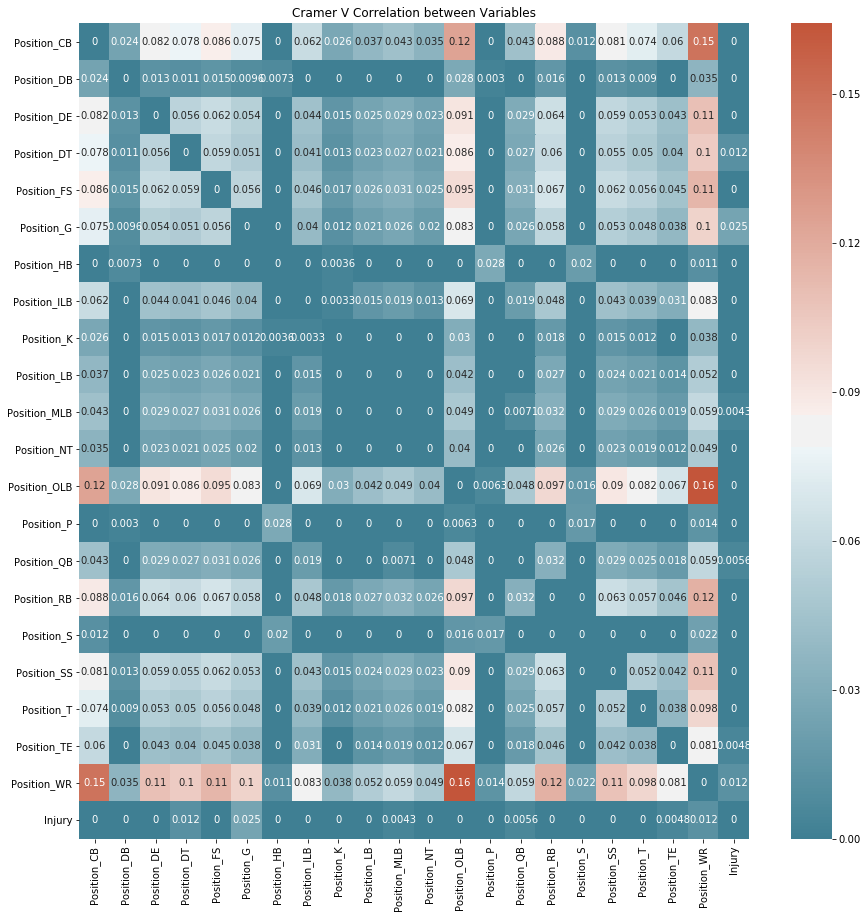

In [37]:
plot_cramers_v_heatmap(play_injury_df_dummies, columns)

And we continue to see no raw correlation between injury and any other feature. Lets Finally work on the last data farme


We should run a simple ML model just to check up how our factors do. Adaboost seems to do well with lots of poorly correlated factors. Lets see how that works.

One of the more complicated aspects of this data set is that there is heavy undersampling of injuries. I turn to Samuel Taylor, a data scientist at Indeed, for help on this. He gave a wonderful lecture that can be found at https://www.samueltaylor.org/articles/how-to-handle-class-imbalance.html on how to deal with class imbalance. I will be implementing some of these techniques in my work and see if any siginificant results occur. I'm also happy I get to use a techinque on a data set so recently after learning how to deal with this specific problem.

In [38]:
corr_df.Injury.value_counts()

0    5637
1     105
Name: Injury, dtype: int64

In [39]:
factors = corr_df.drop(columns = ['Injury','Position'])
output = corr_df.Injury

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(factors, output, test_size = 0.2, random_state = 42)

In [41]:
# Just checking
y_train.value_counts()

0    4514
1      79
Name: Injury, dtype: int64

In [42]:
y_test.value_counts()

0    1123
1      26
Name: Injury, dtype: int64

We should make a dummy classifier. For a case such as this where the class imbalance is so large, predicting no injury for every data point probably creates a really good, but completely useless model. So I think we're going to have to meaure for the true positive predictions.

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
dumb_model = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
y_pred = dumb_model.predict(X_test)
dumb_accuracy = accuracy_score(y_test, y_pred)
precision = precision_recall_fscore_support(y_test, y_pred)
print(dumb_accuracy)
precision

0.9773716275021758


C:\Users\12104\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.97737163, 0.        ]),
 array([1., 0.]),
 array([0.98855634, 0.        ]),
 array([1123,   26], dtype=int64))

In [44]:
# The above array of arrays gives the following information in this order
# Precision: TP/(TP+FP)
# Recall: TP/(TP+FN)
# F-1 Score: 2 *(P*R)/(P+R)
# Total number of elements in our pred/test array

# Real Model Time

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
clf = AdaBoostClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(y_test, y_pred)
precision

C:\Users\12104\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.97737163, 0.        ]),
 array([1., 0.]),
 array([0.98855634, 0.        ]),
 array([1123,   26], dtype=int64))

I freaked out about these results for a minute, but it makes sense. Both models predict the same thing which is that no one ever gets injured. But what I care more about is the true positive rate, so lets go for precision. 

Also, now we will attempt some oversampling techniques for class imbalance to see if we can get better results.

# Undersampling

Real easy. Just sampling from the data set so that the class imbalance is no longer in place, but we have significantly reduced the total number of data points we had before. We are, however, keeping > 60 data points so that our conclusions hold some form of integrity.

In [67]:
factors = corr_df.drop(columns = ['Injury','Position'])
output = corr_df.Injury

In [69]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
factors_res, output_res = rus.fit_resample(factors, output)
print('Resampled dataset shape %s' % Counter(output_res))

Resampled dataset shape Counter({0: 97, 1: 97})


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(factors_res, output_res, test_size = 0.2, random_state = 42)

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
clf = AdaBoostClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(y_test, y_pred)
precision

(array([0.61904762, 0.72222222]),
 array([0.72222222, 0.61904762]),
 array([0.66666667, 0.66666667]),
 array([18, 21], dtype=int64))

In [73]:
# There are more undersampling techniques to pursue in the future if it comes down to it. Reference:
# https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8

# Oversampling:

Three Methods:
    - Random: Replicate data points of minority class
    - SMOTE: Creates data points between minority class data points via clustering
    - ADASYN: Similar process, but slightly different mathematical methodology

Random:

In [74]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
factors_res, output_res = ros.fit_resample(factors, output)
print('Resampled dataset shape %s' % Counter(output_res))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(factors_res, output_res, test_size = 0.2, random_state = 42)

Resampled dataset shape Counter({1: 5103, 0: 5103})


In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
clf = AdaBoostClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(y_test, y_pred)
precision

(array([0.60350877, 0.57203033]),
 array([0.50390625, 0.66699411]),
 array([0.54922831, 0.61587302]),
 array([1024, 1018], dtype=int64))

SMOTE:

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
factors_res, output_res = smote.fit_resample(factors, output)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(factors_res, output_res, test_size = 0.2, random_state = 42)

In [80]:
clf = AdaBoostClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(y_test, y_pred)
precision

(array([0.71675127, 0.69914853]),
 array([0.68945312, 0.7259332 ]),
 array([0.70283723, 0.71228916]),
 array([1024, 1018], dtype=int64))

ADASYN:

In [81]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
factors_res, output_res = adasyn.fit_resample(factors, output)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(factors_res, output_res, test_size = 0.2, random_state = 42)

In [82]:
clf = AdaBoostClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(y_test, y_pred)
precision

(array([0.72884615, 0.70746269]),
 array([0.72053232, 0.71601208]),
 array([0.72466539, 0.71171171]),
 array([1052,  993], dtype=int64))

# The Inclusion of Movement

In [48]:
# We'll work with the injury data set afterwards. It's just a big and intimidating data set for computation time. BUT will be
# included in the final project.
len(trk.PlayKey.unique())

266960